In [3]:
import pandas as pd
import plotly.express as px
import prophet

In [4]:
df = pd.read_csv('../data/external/AMZN.csv')

In [5]:
columns = ['Date', 'Close']
df_v2 = pd.DataFrame(df, columns=columns)
df_v2['Date'] = pd.to_datetime(df['Date'])

In [6]:
prophet_df = df_v2.rename(columns={'Date': 'ds', 'Close': 'y'})

In [7]:
prophet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      252 non-null    datetime64[ns]
 1   y       252 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.1 KB


In [8]:
prophet_df

,ds,y
0,2023-03-23,98.709999
1,2023-03-24,98.129997
2,2023-03-27,98.040001
3,2023-03-28,97.239998
4,2023-03-29,100.250000
...,...,...
247,2024-03-18,174.479996
248,2024-03-19,175.899994
249,2024-03-20,178.149994
250,2024-03-21,178.149994


In [9]:
cutoff_date = pd.to_datetime('2023-12-29')
train_data = prophet_df[prophet_df['ds'] <= cutoff_date]
test_data = prophet_df[prophet_df['ds'] > cutoff_date]

In [35]:
test_data.shape

(57, 2)

In [36]:
train_data.shape

(195, 2)

In [11]:
model = prophet.Prophet()
model.fit(train_data)

14:29:06 - cmdstanpy - INFO - Chain [1] start processing
14:29:06 - cmdstanpy - INFO - Chain [1] done processing


In [37]:
future = model.make_future_dataframe(periods=57)
forecast = model.predict(future)

In [38]:
forecast.tail(57)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
195,2023-12-30,156.156293,152.587826,161.858452,156.156293,156.156293,0.958415,0.958415,0.958415,0.958415,0.958415,0.958415,0.0,0.0,0.0,157.114708
196,2023-12-31,156.505387,152.524537,162.485200,156.505387,156.505387,0.958416,0.958416,0.958416,0.958416,0.958416,0.958416,0.0,0.0,0.0,157.463803
197,2024-01-01,156.854482,151.942467,161.733313,156.844263,156.861300,-0.078326,-0.078326,-0.078326,-0.078326,-0.078326,-0.078326,0.0,0.0,0.0,156.776156
198,2024-01-02,157.203577,152.204879,161.225526,157.173986,157.227787,-0.412590,-0.412590,-0.412590,-0.412590,-0.412590,-0.412590,0.0,0.0,0.0,156.790986
199,2024-01-03,157.552671,151.954223,161.206202,157.498518,157.607544,-0.786970,-0.786970,-0.786970,-0.786970,-0.786970,-0.786970,0.0,0.0,0.0,156.765701
200,2024-01-04,157.901766,152.481545,161.807481,157.817424,157.993529,-0.615498,-0.615498,-0.615498,-0.615498,-0.615498,-0.615498,0.0,0.0,0.0,157.286268
201,2024-01-05,158.250860,153.450589,162.792697,158.131786,158.374973,-0.023446,-0.023446,-0.023446,-0.023446,-0.023446,-0.023446,0.0,0.0,0.0,158.227414
202,2024-01-06,158.599955,154.704596,163.970237,158.439763,158.769749,0.958415,0.958415,0.958415,0.958415,0.958415,0.958415,0.0,0.0,0.0,159.558370
203,2024-01-07,158.949050,155.035605,164.561891,158.727331,159.160307,0.958416,0.958416,0.958416,0.958416,0.958416,0.958416,0.0,0.0,0.0,159.907465
204,2024-01-08,159.298144,154.616174,164.045462,159.021992,159.546267,-0.078326,-0.078326,-0.078326,-0.078326,-0.078326,-0.078326,0.0,0.0,0.0,159.219818


In [39]:
px.line(forecast, x='ds', y='yhat')

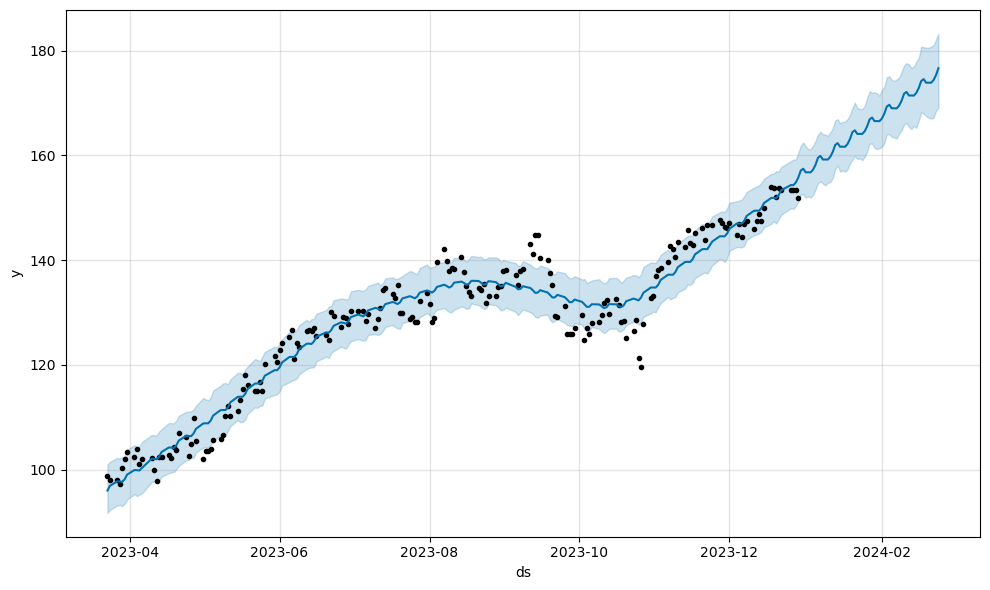

In [40]:
figure = model.plot(forecast, xlabel='ds', ylabel='y')

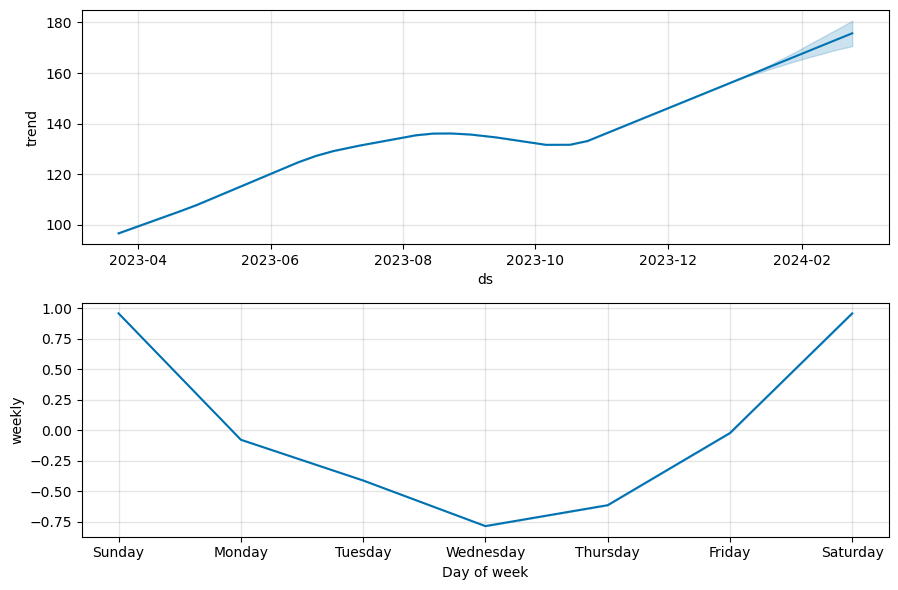

In [41]:
figure2 = model.plot_components(forecast)

In [42]:
forecast.to_csv('forecast.csv')